## Final Code File


## Importing The data 

In [1]:
import pandas as pd
import plotly.express as px
from shapely.geometry import Point, Polygon
from pyproj import crs
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import contextily as cx


Downloaded from "https://data.cityofchicago.org/Community-Economic-Development/City-Owned-Land-Inventory/aksk-kvfp/about_data"

In [2]:
df=pd.read_csv('/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/Data/City-Owned_Land_Inventory_20250207.csv')

In [3]:
df.describe()

,ID,Sq. Ft.,Square Footage - City Estimate,Land Value (2022),Ward,Community Area Number,Zip Code,X Coordinate,Y Coordinate,Latitude,Longitude
count,20574.000000,1.939000e+04,4198.000000,4.277000e+03,17947.000000,17947.000000,19387.000000,1.794700e+04,1.794700e+04,17947.000000,17947.000000
mean,35232.695101,1.802271e+03,5079.615660,5.121154e+04,18.179584,45.657993,49925.761593,1.168659e+06,1.872762e+06,41.806371,-87.656976
std,20337.721629,7.464811e+04,19235.317621,3.733608e+05,9.240090,17.850046,23114.877729,1.360663e+04,2.435525e+04,0.067035,0.049429
min,108.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.119442e+06,1.814208e+06,41.645437,-87.836143
25%,18156.500000,0.000000e+00,2988.000000,9.281000e+03,10.000000,29.000000,60609.000000,1.157521e+06,1.859142e+06,41.768851,-87.697097
50%,34245.500000,0.000000e+00,3122.000000,1.210200e+04,19.000000,43.000000,60621.000000,1.170108e+06,1.869668e+06,41.797810,-87.651788
75%,58843.750000,0.000000e+00,3916.250000,2.029700e+04,24.000000,67.000000,60630.000000,1.177195e+06,1.894302e+06,41.865791,-87.625732
max,69798.000000,1.021020e+07,703517.000000,1.275000e+07,50.000000,77.000000,60827.000000,1.203321e+06,1.951596e+06,42.022831,-87.531304


In [4]:
non_na_summary = df.count()
print(non_na_summary)

ID                                20574
PIN                               20574
Address                           18037
Managing Organization              8902
Property Status                   20540
Date of Acquisition               10877
Date of Disposition                3772
Sales Status                       9082
Sale Offering Status                488
Sale Offering Reason                489
Sq. Ft.                           19390
Square Footage - City Estimate     4198
Land Value (2022)                  4277
Ward                              17947
Community Area Number             17947
Community Area Name               17944
Zoning Classification             17944
Zip Code                          19387
Last Update                       20574
Application Use                     525
Grouped Parcels                     311
Application Deadline                808
Offer Round                         815
Application URL                     713
X Coordinate                      17947


In [5]:
## Exploratory analysis. # pin removed and 
df.rename(columns={'PIN':'pin'}, inplace=True)
df['pin'] = df['pin'].str.replace('-', '', regex=True)  # Remove hyphens
pin_values = df['pin'].unique().tolist()  # Get unique PINs

In [6]:
city_shape= gpd.read_file('/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/Data/Chicago_City_Limits-shp/Chicago_City_Limits.shp')

### Now importing the API Data using the unique pins

In [7]:
from sodapy import Socrata

# Initialize Socrata client
client = Socrata("datacatalog.cookcountyil.gov", None)

# Ensure 'pin' column is formatted correctly in df

# API allows a limited number of conditions in the 'where' clause, so we batch the requests
chunk_size = 100  # Adjust this based on API limits
filtered_results = []

for i in range(0, len(pin_values), chunk_size):
    pin_chunk = pin_values[i:i + chunk_size]

    # Format where clause dynamically using 'IN' instead of 'OR' for better API compatibility
    pin_filter = " OR ".join([f"pin='{p}'" for p in pin_chunk]) 

    try:
        results = client.get("nj4t-kc8j", where=pin_filter, limit=50000)  # Adjust limit as needed

        if results:
            filtered_results.append(pd.DataFrame.from_records(results))

        print(f"Fetched {i + len(pin_chunk)} records...")
    
    except Exception as e:
        print(f"Error fetching batch {i}-{i+chunk_size}: {e}")

# Combine all fetched data into a single DataFrame
if filtered_results:
    results_df = pd.concat(filtered_results, ignore_index=True)
else:
    results_df = pd.DataFrame()  # Empty if no results

# Ensure 'pin' is the same format in both DataFrames before merging
if not results_df.empty:
    results_df['pin'] = results_df['pin'].astype(str)

# Merge df (original data) with results_df (API data), adding columns instead of rows
merged_df = df.merge(results_df, on='pin', how='inner')

# Display the merged DataFrame
print(merged_df)

Fetched 100 records...
Fetched 200 records...
Fetched 300 records...
Fetched 400 records...
Fetched 500 records...
Fetched 600 records...
Fetched 700 records...
Fetched 800 records...
Fetched 900 records...
Fetched 1000 records...
Fetched 1100 records...
Fetched 1200 records...
Fetched 1300 records...
Fetched 1400 records...
Fetched 1500 records...
Fetched 1600 records...
Fetched 1700 records...
Fetched 1800 records...
Fetched 1900 records...
Fetched 2000 records...
Fetched 2100 records...
Fetched 2200 records...
Fetched 2300 records...
Fetched 2400 records...
Fetched 2500 records...
Fetched 2600 records...
Fetched 2700 records...
Fetched 2800 records...
Fetched 2900 records...
Fetched 3000 records...
Fetched 3100 records...
Fetched 3200 records...
Fetched 3300 records...
Fetched 3400 records...
Fetched 3500 records...
Fetched 3600 records...
Fetched 3700 records...
Fetched 3800 records...
Fetched 3900 records...
Fetched 4000 records...
Fetched 4100 records...
Fetched 4200 records...
F

In [8]:
merged_df['pin'].value_counts()

pin
25223040080000    27
16233100190000    27
25162060020000    27
20262030140000    27
16093150931002    27
                  ..
19172070260000     2
20153170420000     2
19172070250000     2
17221100230000     2
17173280140000     1
Name: count, Length: 20436, dtype: int64

In [9]:
df_latest = merged_df.loc[merged_df.groupby('pin')['year'].idxmax()]

# Display the final DataFrame
print(df_latest)

           ID             pin               Address Managing Organization  \
266292   7473  10253160220000     7201 N KEDZIE AVE         Park District   
28951   66030  10333250260000     6430 N LEHIGH AVE                   AIS   
404822   7474  10362280400000     2602 W PRATT BLVD                   NaN   
450396   7475  10362280410000     2600 W PRATT BLVD                   NaN   
545019  36361  10363250110000  6444 N FRANCISCO AVE          DPD Planning   
...       ...             ...                   ...                   ...   
318374  59229  26314180390000       3249 E 136TH ST      DPD - Large Lots   
390937  37481  26314200080000      13610 S AVENUE O                   NaN   
32373   37413  26321110050000      13311 S AVENUE N                   NaN   
337796  66476  26323020410000      13458 S AVENUE L                 Other   
222535  37476  26323040080000      13537 S AVENUE O                   NaN   

       Property Status Date of Acquisition Date of Disposition  \
266292  N

In [10]:
## keep only the latest year for each pin
df_latest = merged_df.loc[merged_df.groupby('pin')['year'].idxmax()]

# Display the final DataFrame
print(df_latest)

           ID             pin               Address Managing Organization  \
266292   7473  10253160220000     7201 N KEDZIE AVE         Park District   
28951   66030  10333250260000     6430 N LEHIGH AVE                   AIS   
404822   7474  10362280400000     2602 W PRATT BLVD                   NaN   
450396   7475  10362280410000     2600 W PRATT BLVD                   NaN   
545019  36361  10363250110000  6444 N FRANCISCO AVE          DPD Planning   
...       ...             ...                   ...                   ...   
318374  59229  26314180390000       3249 E 136TH ST      DPD - Large Lots   
390937  37481  26314200080000      13610 S AVENUE O                   NaN   
32373   37413  26321110050000      13311 S AVENUE N                   NaN   
337796  66476  26323020410000      13458 S AVENUE L                 Other   
222535  37476  26323040080000      13537 S AVENUE O                   NaN   

       Property Status Date of Acquisition Date of Disposition  \
266292  N

### Making summary tables


In [11]:
import pandas as pd
import numpy as np

def create_summary_table(df_latest):
    summary = pd.DataFrame()

    # Numerical variables
    for col in ['Sq. Ft.', 'Square Footage - City Estimate', 'Land Value (2022)', 'Latitude', 'Longitude']:
        summary[col] = df_latest[col].agg(['count', 'mean', 'std', 'min', 'max'])
        summary.loc['25%', col] = df_latest[col].quantile(0.25)
        summary.loc['50%', col] = df_latest[col].quantile(0.50)
        summary.loc['75%', col] =df_latest[col].quantile(0.75)

    # Categorical variables
    for col in ['Property Status', 'Sales Status', 'Ward', 'Community Area Name', 'Zoning Classification']:
        summary[col] = pd.Series({
            'count': df_latest[col].count(),
            'unique': df_latest[col].nunique(),
            'top': df_latest[col].value_counts().index[0],
            'freq': df_latest[col].value_counts().iloc[0]
        })

    # Date variables
    for col in ['Date of Acquisition', 'Date of Disposition']:
        df_latest[col] = pd.to_datetime(df_latest[col], errors='coerce')
        date_stats = df_latest[col].agg(['min', 'max'])
        summary[col] = pd.Series({
            'count': df_latest[col].count(),
            'min': date_stats['min'],
            'max': date_stats['max'],
            'range_days': (date_stats['max'] - date_stats['min']).days
        })

    return summary.T  # Transpose for better readability

# Create and print the summary table
summary_table = create_summary_table(df_latest)
print(summary_table)

# Optionally, save to CSV
summary_table.to_csv('summary_statistics_final.csv')


                                  count          mean            std  \
Sq. Ft.                         19388.0   1802.457087   74651.955681   
Square Footage - City Estimate   4197.0   5080.825957   19237.449722   
Land Value (2022)                4276.0  51215.239935  373404.401149   
Latitude                        17934.0     41.806335       0.067002   
Longitude                       17934.0    -87.656972       0.049413   
Property Status                   20435           NaN            NaN   
Sales Status                       9081           NaN            NaN   
Ward                            17934.0           NaN            NaN   
Community Area Name               17931           NaN            NaN   
Zoning Classification             17931           NaN            NaN   
Date of Acquisition               10836           NaN            NaN   
Date of Disposition                3769           NaN            NaN   

                                                min            

In [12]:
df_latest['Property Status'].value_counts()

Property Status
Owned by City     12299
Sold               5694
Leased             1493
Not City Owned      871
Ownd by City         50
Sold by City         11
Sold By City          9
In Acquisition        8
Name: count, dtype: int64

In [13]:
missing_longitude = df_latest['Longitude'].isna().sum()
missing_latitude = df_latest['Latitude'].isna().sum()

print(f"Missing Longitude values: {missing_longitude}")
print(f"Missing Latitude values: {missing_latitude}")

Missing Longitude values: 2502
Missing Latitude values: 2502


In [14]:
# Define mapping for standardizing property status values
property_status_mapping = {
    "Owned by City": "Owned by City",
    "Ownd by City": "Owned by City",  # Fix typo
    "Sold": "Sold",
    "Sold by City": "Sold",
    "Sold By City": "Sold",  # Fix capitalization
    "Leased": "Leased",
    "Not City Owned": "Not City Owned",
    "In Acquisition": "In Acquisition"
}


In [74]:
df_latest["Property Status"] = df_latest["Property Status"].replace(property_status_mapping)

# Verify the unique values after mapping
print(df_latest["Property Status"].value_counts())

Property Status
Owned by City     12349
Sold               5714
Leased             1493
Not City Owned      871
In Acquisition        8
Name: count, dtype: int64


In [77]:
df_latest_cleaned = df_latest.dropna(subset=['Longitude', 'Latitude'])

# Display the cleaned DataFrame
print(df_latest_cleaned)

           ID             pin               Address Managing Organization  \
266292   7473  10253160220000     7201 N KEDZIE AVE         Park District   
28951   66030  10333250260000     6430 N LEHIGH AVE                   AIS   
404822   7474  10362280400000     2602 W PRATT BLVD                   NaN   
450396   7475  10362280410000     2600 W PRATT BLVD                   NaN   
545019  36361  10363250110000  6444 N FRANCISCO AVE          DPD Planning   
...       ...             ...                   ...                   ...   
318374  59229  26314180390000       3249 E 136TH ST      DPD - Large Lots   
390937  37481  26314200080000      13610 S AVENUE O                   NaN   
32373   37413  26321110050000      13311 S AVENUE N                   NaN   
337796  66476  26323020410000      13458 S AVENUE L                 Other   
222535  37476  26323040080000      13537 S AVENUE O                   NaN   

       Property Status Date of Acquisition Date of Disposition  \
266292  N

In [17]:
df_latest_cleaned.to_csv('/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/Data/assessment_and_city_owned_new_data.csv')

## Assessor's Values Data 

In [45]:

from sodapy import Socrata

# Initialize Socrata client
client = Socrata("datacatalog.cookcountyil.gov", None)

# Ensure 'pin' column is formatted correctly in df

# API allows a limited number of conditions in the 'where' clause, so we batch the requests
chunk_size = 100  # Adjust this based on API limits
filtered_results = []

for i in range(0, len(pin_values), chunk_size):
    pin_chunk = pin_values[i:i + chunk_size]

    # Format where clause dynamically using 'IN' instead of 'OR' for better API compatibility
    pin_filter = " OR ".join([f"pin='{p}'" for p in pin_chunk]) 

    try:
        results = client.get("uzyt-m557", where=pin_filter, limit=50000)  # Adjust limit as needed

        if results:
            filtered_results.append(pd.DataFrame.from_records(results))

        print(f"Fetched {i + len(pin_chunk)} records...")
    
    except Exception as e:
        print(f"Error fetching batch {i}-{i+chunk_size}: {e}")

# Combine all fetched data into a single DataFrame
if filtered_results:
    results_df = pd.concat(filtered_results, ignore_index=True)
else:
    results_df = pd.DataFrame()  # Empty if no results

# Ensure 'pin' is the same format in both DataFrames before merging
if not results_df.empty:
    results_df['pin'] = results_df['pin'].astype(str)

# Merge df (original data) with results_df (API data), adding columns instead of rows
merged_assess = df_latest_cleaned.merge(results_df, on='pin', how='inner')

# Display the merged DataFrame
print(merged_assess)

Fetched 100 records...
Fetched 200 records...
Fetched 300 records...
Fetched 400 records...
Fetched 500 records...
Fetched 600 records...
Fetched 700 records...
Fetched 800 records...
Fetched 900 records...
Fetched 1000 records...
Fetched 1100 records...
Fetched 1200 records...
Fetched 1300 records...
Fetched 1400 records...
Fetched 1500 records...
Fetched 1600 records...
Fetched 1700 records...
Fetched 1800 records...
Fetched 1900 records...
Fetched 2000 records...
Fetched 2100 records...
Fetched 2200 records...
Fetched 2300 records...
Fetched 2400 records...
Fetched 2500 records...
Fetched 2600 records...
Fetched 2700 records...
Fetched 2800 records...
Fetched 2900 records...
Fetched 3000 records...
Fetched 3100 records...
Fetched 3200 records...
Fetched 3300 records...
Fetched 3400 records...
Fetched 3500 records...
Fetched 3600 records...
Fetched 3700 records...
Fetched 3800 records...
Fetched 3900 records...
Fetched 4000 records...
Fetched 4100 records...
Fetched 4200 records...
F

In [62]:
unique_years = results_df['year'].unique()
print(unique_years)

['1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008'
 '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018'
 '2019' '2020' '2021' '2022' '2023' '2024' '2025']


In [64]:
results_df['year'] = results_df['year'].astype(int)

In [65]:
results_df_2022 = results_df[results_df['year'] == 2022]

In [66]:
results_df_2022['pin'] = results_df_2022['pin'].astype('Int64')

/var/folders/9c/cqhq_9tn7xg260y42gb15wym0000gn/T/ipykernel_11960/2982695272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_2022['pin'] = results_df_2022['pin'].astype('Int64')


In [84]:
type(pin_values[2:])

list

In [88]:
df_latest_cleaned['pin'] = df_latest_cleaned['pin'].astype(int)

/var/folders/9c/cqhq_9tn7xg260y42gb15wym0000gn/T/ipykernel_11960/2165317518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest_cleaned['pin'] = df_latest_cleaned['pin'].astype(int)


In [89]:
df_latest_cleaned.head()

,ID,pin,Address,Managing Organization,Property Status,Date of Acquisition,Date of Disposition,Sales Status,Sale Offering Status,Sale Offering Reason,...,econ_enterprise_zone_num,econ_enterprise_zone_data_year,econ_industrial_growth_zone_num,econ_industrial_growth_zone_data_year,econ_central_business_district_num,econ_central_business_district_data_year,census_school_district_elementary_geoid,census_school_district_secondary_geoid,census_acs5_school_district_elementary_geoid,census_acs5_school_district_secondary_geoid
266292,7473,10253160220000,7201 N KEDZIE AVE,Park District,Not City Owned,1973-12-14,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28951,66030,10333250260000,6430 N LEHIGH AVE,AIS,Owned by City,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404822,7474,10362280400000,2602 W PRATT BLVD,NaN,Owned by City,2001-02-13,NaT,Interest,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450396,7475,10362280410000,2600 W PRATT BLVD,NaN,Owned by City,2001-02-13,NaT,Interest,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545019,36361,10363250110000,6444 N FRANCISCO AVE,DPD Planning,Owned by City,2015-01-20,NaT,Application Closed,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
import re
non_numeric_pins = [pin for pin in pin_values if not pin.isdigit()]
print("Non-numeric PINs:", non_numeric_pins)
pin_values_cleaned = [int(re.sub(r'\D', '', pin)) for pin in pin_values]

Non-numeric PINs: ['2019411002/003', '2015304010/011']


In [91]:
df_latest_cleaned.describe()

,ID,pin,Date of Acquisition,Date of Disposition,Sq. Ft.,Square Footage - City Estimate,Land Value (2022),Ward,Community Area Number,Zip Code,X Coordinate,Y Coordinate,Latitude,Longitude
count,17934.000000,1.793400e+04,9169,3151,1.772200e+04,4181.000000,4.260000e+03,17934.000000,17934.000000,17721.000000,1.793400e+04,1.793400e+04,17934.000000,17934.000000
mean,34376.616650,1.946819e+13,1997-10-03 13:17:30.278110848,2014-03-23 19:39:58.095842816,1.930827e+03,4914.386750,4.935403e+04,18.174417,45.669957,54355.872581,1.168660e+06,1.872748e+06,41.806335,-87.656972
min,108.000000,1.025316e+13,1872-12-11 00:00:00,1978-06-06 00:00:00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.119442e+06,1.814208e+06,41.645437,-87.836143
25%,17079.750000,1.623320e+13,1993-04-27 00:00:00,2008-10-30 00:00:00,0.000000e+00,2988.000000,9.279750e+03,10.000000,29.000000,60612.000000,1.157523e+06,1.859142e+06,41.768839,-87.697085
50%,34332.500000,2.009308e+13,2000-02-10 00:00:00,2017-11-14 00:00:00,0.000000e+00,3122.000000,1.202650e+04,19.000000,43.000000,60621.000000,1.170109e+06,1.869657e+06,41.797779,-87.651787
75%,58517.750000,2.022206e+13,2004-12-29 00:00:00,2019-01-16 12:00:00,0.000000e+00,3911.000000,2.026300e+04,24.000000,67.000000,60636.000000,1.177195e+06,1.894289e+06,41.865723,-87.625733
max,69798.000000,2.632304e+13,2029-03-12 00:00:00,2025-01-16 00:00:00,1.021020e+07,703517.000000,1.275000e+07,50.000000,77.000000,60827.000000,1.203321e+06,1.951596e+06,42.022831,-87.531304
std,20065.477804,3.128688e+12,NaN,NaN,7.806854e+04,18474.762813,3.709483e+05,9.232211,17.844379,18463.141548,1.360235e+04,2.434315e+04,0.067002,0.049413


In [93]:
# Keep only rows with valid numeric PINs
df_latest_cleaned = df_latest_cleaned[df_latest_cleaned['pin'].isin(pin_values_cleaned)]
results_df_2022 = results_df_2022[results_df_2022['pin'].isin(pin_values_cleaned)]

In [94]:
assessment_city_owned = df_latest_cleaned.merge(results_df_2022, on='pin', how='left', suffixes=('_old', '_new'))


In [95]:
assessment_city_owned.to_csv('/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/new_assessment/assessment_and_city_owned_new_data.csv')

## Assessors and cleaned city inventory analysis

## Importing the previously exported data 

In [96]:
df=pd.read_csv('/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/new_assessment/assessment_and_city_owned_new_data.csv')

/var/folders/9c/cqhq_9tn7xg260y42gb15wym0000gn/T/ipykernel_11960/3971055528.py:1: DtypeWarning: Columns (99,124) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/new_assessment/assessment_and_city_owned_new_data.csv')


In [97]:
df.shape

(17934, 150)

In [19]:
df['Property Status'].value_counts()

Property Status
Owned by City     11625
Sold               5318
Not City Owned      820
Leased              164
In Acquisition        7
Name: count, dtype: int64

In [100]:
df[['Longitude', 'Latitude']].isna().sum()

Longitude    0
Latitude     0
dtype: int64

## Plotting Folium

In [102]:
crs = "EPSG:4326"
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df_latest_cleaned['Longitude'], df_latest_cleaned['Latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df_latest_cleaned,
 crs = crs,
 geometry = geometry)

In [103]:
m = folium.Map(location=[41.881832, -87.623177], zoom_start=10, control_scale=True)


In [104]:
from branca.element import Template, MacroElement

class ColorLegend(MacroElement):
    def __init__(self, colors):
        super(ColorLegend, self).__init__()
        self._template = Template("""
        {% macro html(this, kwargs) %}
        <div style="position: fixed; bottom: 50px; left: 50px; width: 200px; 
                    border:2px solid grey; z-index:9999; font-size:12px; background-color:white;">
            <div style="position: relative; top: 3px; left: 3px; padding: 5px;">
            <p style="margin: 0; padding: 0;"><strong>Property Status</strong></p>
            {% for item in this.colors %}
            <p style="margin: 0; padding: 0;">
                <i class="fa fa-circle fa-1x" style="color:{{item[1]}}"></i> {{item[0]}}
            </p>
            {% endfor %}
            </div>
        </div>
        {% endmacro %}
        """)
        self.colors = colors

# Define the color mapping
color_mapping = {
    'Owned by City': '#1f77b4',
    'Sold': '#ff7f0e',
    'Leased': '#2ca02c',
    'Not City Owned': '#9467bd',
    'In Acquisition': '#bcbd22',
}

In [105]:
import folium
import geopandas as gpd
from folium.plugins import MarkerCluster

# Initialize the folium map
m = folium.Map(location=[41.881832, -87.623177], zoom_start=10, control_scale=True)

# Marker cluster for property status markers
marker_cluster = MarkerCluster().add_to(m)

def get_color(status):
    return color_mapping.get(status, '#000000')  

# Add markers for properties
for idx, row in geo_df.iterrows():
    if not row.geometry.is_empty:
        folium.CircleMarker(
            location=[row.geometry.y, row.geometry.x],
            radius=5,
            popup=f"Property Status: {row['Property Status']}",
            color=get_color(row['Property Status']),
            fill=True,
            fillColor=get_color(row['Property Status']),
            fillOpacity=0.7
        ).add_to(marker_cluster)

# Load and add city boundaries
city_shape = gpd.read_file("/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/Data/Chicago_City_Limits-shp/Chicago_City_Limits.shp").to_crs(epsg=4326)
folium.GeoJson(
    city_shape,
    name="City Boundary",
    style_function=lambda x: {'fillColor': 'pink', 'color': 'pink', 'weight': 1, 'fillOpacity': 0.4}
).add_to(m)

# Load and add CTA Bus Routes
cta_bus_routes = gpd.read_file("/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/Data/CTA_BusRoutes/CTA_BusRoutes.shp").to_crs(epsg=4326)
folium.GeoJson(
    cta_bus_routes,
    name="CTA Bus Routes",
    style_function=lambda x: {"color": "blue", "weight": 2, "opacity": 0.5}
).add_to(m)

cta_rail_routes = gpd.read_file("/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/Data/CTA_RailLines/CTA_RailLines.shp").to_crs(epsg=4326)
folium.GeoJson(
    cta_rail_routes,
    name="CTA Rail Routes",
    style_function=lambda x: {"color": "red", "weight": 3, "opacity": 0.9}
).add_to(m)

cta_stations = gpd.read_file("/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/Data/CTA_RailStations/CTA_RailStations.shp").to_crs(epsg=4326)

for idx, row in cta_stations.iterrows():
    if not row.geometry.is_empty:
        folium.CircleMarker(
            location=[row.geometry.y, row.geometry.x],
            radius=6,
            popup=f"Station: {row['LONGNAME']}",  # Adjust if column name is different
            color="red",
            fill=True,
            fillColor="red",
            fillOpacity=0.8
        ).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)
legend_colors = [(status, color) for status, color in color_mapping.items()]

m.get_root().add_child(ColorLegend(legend_colors))
# Display map
m.save('/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/maps/mapfolium.html')

## Making new Zoning Classes

In [25]:
# geo_df['zoning'] = geo_df['Zoning Classification'].str[:2]


In [127]:
df['zoning_class'] = df['Zoning Classification'].str.extract(r'([A-Za-z]+\d?)')
df['zoning_class'].value_counts().sort_index(ascending=True)
zoning_type=df.groupby('zoning_class').size().reset_index(name='count')

In [128]:
area_total_by_class=df['Sq. Ft.'].groupby(df['zoning_class']).sum()


Residential R - Residential
Commercial B - Business
Commercial C - Commercial
Commercial D - Downtown
Manufacturing M - Manufacturing
Manufacturing PMD - Planned Manufacturing Districts
Planned Development PD - Planned Development
Transportation T - Transportation
Parks and Open Space POS - Parks and Open Space

In [129]:
zoning_class_counts = df['zoning_class'].value_counts()
zoning_mapping = {
    "R": "Residential",
    "B": "Business",
    "C": "Commercial",
    "D": "Downtown",
    "M": "Manufacturing",
    "PMD": "Planned Manufacturing Districts",
    "PD": "Planned Development",
    "T": "Transportation",
    "POS": "Parks and Open Space"
}

In [130]:
df['zoning_class'] = df['zoning_class'].astype(str)

df['zone'] = df['zoning_class'].apply(lambda x: next((v for k, v in zoning_mapping.items() if x.startswith(k)), "Unknown"))

df['zone'].value_counts()

zone
Residential                        11595
Business                            2371
Planned Development                 1206
Commercial                          1175
Manufacturing                        873
Planned Manufacturing Districts      353
Parks and Open Space                 252
Downtown                              96
Transportation                        10
Unknown                                3
Name: count, dtype: int64

In [131]:
selected_areas = ['ENGLEWOOD', 'WEST ENGLEWOOD', 'North Lawndale', 'West Garfield Park', 'East Garfield Park', 'New City']
selected_areas = [area.upper() for area in selected_areas]
df_selected = df[df['chicago_community_area_name'].isin(selected_areas)]

In [112]:
# Create a cross-tabulation table
status_table = pd.crosstab(
    index=df_selected['chicago_community_area_name'],
    columns=df_selected['Property Status'],
    margins=True,
    margins_name="Total"
)

# Reorder columns to match your desired format
column_order = [ 'Sold', 'Owned by City', 'Leased', 'In Acquisition', 'Not City Owned', 'Total']
status_table = status_table.reindex(columns=column_order)

# Rename index for clarity
status_table.index.name = 'Community Area'

# Sort communities alphabetically (optional)
status_table = status_table.sort_index()

# Add any missing status columns with 0 values (if needed)
for col in column_order:
    if col not in status_table.columns:
        status_table[col] = 0

print(status_table)


Property Status     Sold  Owned by City  Leased  In Acquisition  \
Community Area                                                    
EAST GARFIELD PARK   445            554       0               0   
ENGLEWOOD            496           1339       0               1   
NEW CITY             467            825       1               0   
NORTH LAWNDALE       478            848       4               0   
Total               2356           4942       7               1   
WEST ENGLEWOOD       300           1019       1               0   
WEST GARFIELD PARK   170            357       1               0   

Property Status     Not City Owned  Total  
Community Area                             
EAST GARFIELD PARK               8   1007  
ENGLEWOOD                       56   1892  
NEW CITY                        80   1373  
NORTH LAWNDALE                  33   1363  
Total                          211   7517  
WEST ENGLEWOOD                  32   1352  
WEST GARFIELD PARK               2    530  


In [113]:
df_aggre=pd.DataFrame(status_table)
df_aggre.to_csv('disaggre_status.csv')

## Maps and visualization

## Value Types for Zoning Classes (Pie Chart)

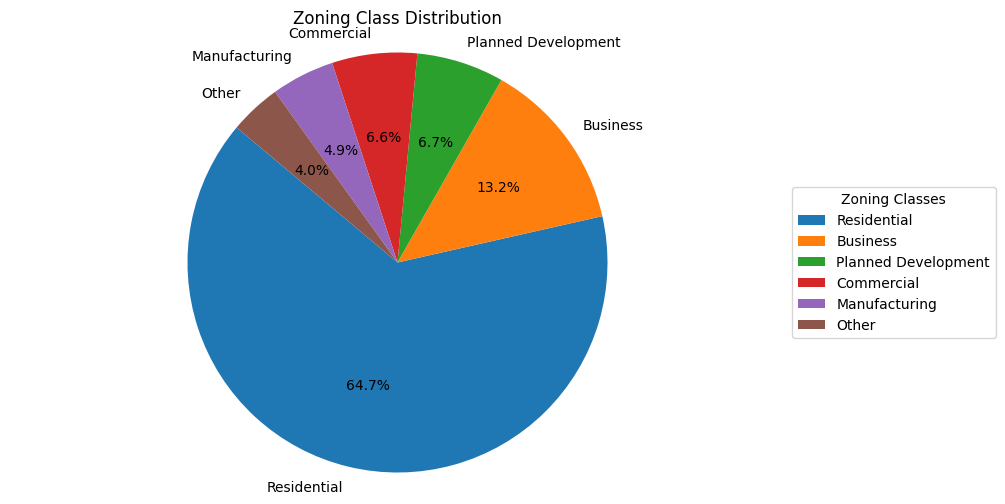

In [114]:
import matplotlib.pyplot as plt

# Calculate the value counts and percentages
zone_counts = df['zone'].value_counts()
zone_percentages = zone_counts / zone_counts.sum() * 100

# Filter out categories less than 2 percent
filtered_zone_counts = zone_counts[zone_percentages >= 2]

# Add an "Other" category for the remaining zones
other_count = zone_counts[zone_percentages < 2].sum()
if other_count > 0:
    filtered_zone_counts['Other'] = other_count

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(filtered_zone_counts, labels=filtered_zone_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Zoning Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend
plt.legend(filtered_zone_counts.index, title="Zoning Classes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

## Census Tract Vacant Lots

In [115]:
selected_areas = ['ENGLEWOOD', 'WEST ENGLEWOOD', 'North Lawndale', 'West Garfield Park', 'East Garfield Park', 'New City']
selected_areas = [area.upper() for area in selected_areas]
df_selected = df[df['chicago_community_area_name'].isin(selected_areas)]

In [116]:
df_selected['chicago_community_area_name'].value_counts()

chicago_community_area_name
ENGLEWOOD             1892
NEW CITY              1373
NORTH LAWNDALE        1363
WEST ENGLEWOOD        1352
EAST GARFIELD PARK    1007
WEST GARFIELD PARK     530
Name: count, dtype: int64

In [117]:
df_selected.shape

(7517, 152)

/var/folders/9c/cqhq_9tn7xg260y42gb15wym0000gn/T/ipykernel_11960/322306700.py:5: DtypeWarning: Columns (99,124) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


       Unnamed: 0     ID             pin                Address  \
1277         1277   8715  16103100070000         4501 W LAKE ST   
1278         1278  37248  16103100140000       4516 W FULTON ST   
1279         1279  66637  16103100160000       4510 W FULTON ST   
1280         1280  37236  16103100170000       4508 W FULTON ST   
1281         1281  37235  16103100180000       4506 W FULTON ST   
...           ...    ...             ...                    ...   
14689       14689  37656  20302150190000  7245 S MARSHFIELD AVE   
14690       14690  19293  20302150410000     7242 S ASHLAND AVE   
14691       14691  19294  20302190360000         7338 S WOOD ST   
14694       14694  67710  20302240310000         1625 W 74TH ST   
14695       14695  67711  20302240320000         1635 W 74TH ST   

      Managing Organization Property Status Date of Acquisition  \
1277                    NaN            Sold                 NaN   
1278                    NaN   Owned by City          2003-06-

KeyboardInterrupt: 

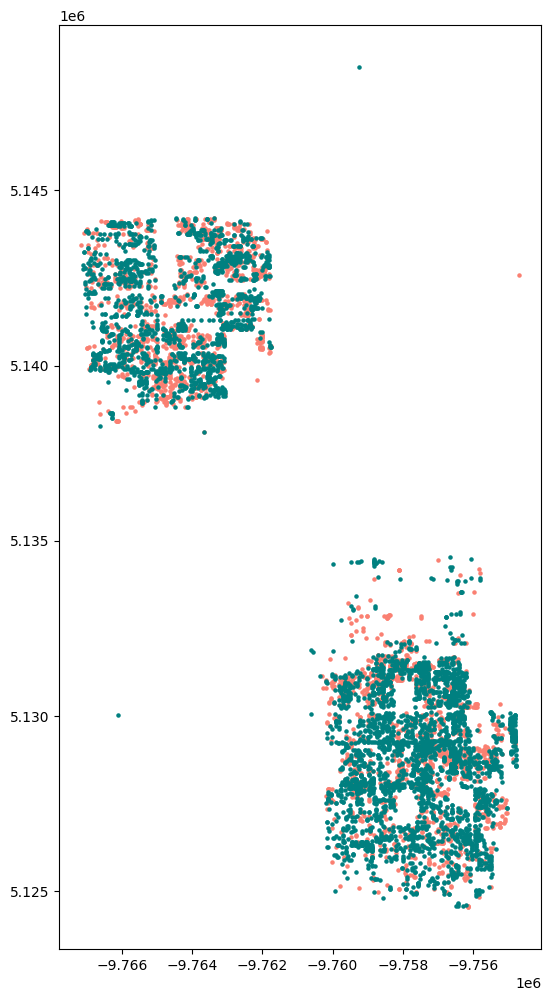

In [119]:


# Load the data
file_path = '/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/new_assessment/assessment_and_city_owned_new_data.csv'

try:
    df = pd.read_csv(
        file_path,
        dtype={
            'pin': str,
            'Zip Code': str,
            'census_tract_geoid': str,
            'Property Status': str
        }
    )
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Select specific areas
selected_areas = ['ENGLEWOOD', 'WEST ENGLEWOOD', 'NORTH LAWNDALE', 'WEST GARFIELD PARK', 'EAST GARFIELD PARK', 'NEW CITY']
df_selected = df[df['chicago_community_area_name'].str.upper().isin(selected_areas)].copy()

# Ensure Longitude and Latitude are numeric
df_selected['Longitude'] = pd.to_numeric(df_selected['Longitude'], errors='coerce')
df_selected['Latitude'] = pd.to_numeric(df_selected['Latitude'], errors='coerce')

# Drop rows with missing Longitude or Latitude
df_selected = df_selected.dropna(subset=['Longitude', 'Latitude'])

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df_selected['Longitude'], df_selected['Latitude'])]
df_selected = gpd.GeoDataFrame(df_selected, geometry=geometry, crs="EPSG:4326")

# Filter for 'Sold' and 'Owned by City' properties
selected_statuses = ['Sold', 'Owned by City']
filtered_properties = df_selected[df_selected['Property Status'].isin(selected_statuses)]

# Display the filtered properties
print(filtered_properties)

# Color mapping for property status
color_mapping = {
    'Sold': 'Salmon',  # Orange
    'Owned by City': 'Teal',  # Green
}

# Create the map
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the filtered properties
for status in selected_statuses:
    status_gdf = filtered_properties[filtered_properties['Property Status'] == status]
    status_gdf.to_crs(epsg=3857).plot(ax=ax, color=color_mapping[status], markersize=5, label=status)

# Add a basemap
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

# Remove axis
ax.set_axis_off()

# Add title
plt.title('Sold and Owned by City Properties', fontsize=16)

# Add legend
plt.legend()

# Show the map
plt.show()


In [ ]:

import folium
import geopandas as gpd
from folium.plugins import MarkerCluster

# Assuming df_selected is your DataFrame
# Verify it has 'geometry', 'Property Status' and other required columns
if not isinstance(df_selected, gpd.GeoDataFrame):
    print("Error: df_selected is not a GeoDataFrame.  Make sure you've created it correctly.")
    exit()

# Color mapping for property status
color_mapping = {
    'Sold': '#FFA500',  # Orange
    'Owned by City': '#008000',  # Green
    'Available for Sale': '#FFFF00',  # Yellow
    'Disposition Approved': '#800080', # Purple
    'Owned by Another Government Agency': '#0000FF', # Blue
    'Inter-Agency Transfer': '#A52A2A'  # Brown
}

# Initialize the folium map, centered on Chicago
m = folium.Map(location=[41.881832, -87.623177], zoom_start=10, control_scale=True)

# Marker cluster for property status markers
marker_cluster = MarkerCluster().add_to(m)

def get_color(status):
    return color_mapping.get(status, '#000000')  # Default to black if status not in mapping

# Add markers for properties
for idx, row in df_selected.iterrows():
    if not row.geometry.is_empty:
        folium.CircleMarker(
            location=[row.geometry.y, row.geometry.x],
            radius=5,
            popup=f"Property Status: {row['Property Status']}",
            color=get_color(row['Property Status']),
            fill=True,
            fillColor=get_color(row['Property Status']),
            fillOpacity=0.7
        ).add_to(marker_cluster)

# Load and add city boundaries
try:
    city_shape = gpd.read_file("/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/Data/Chicago_City_Limits-shp/Chicago_City_Limits.shp").to_crs(epsg=4326)
    folium.GeoJson(
        city_shape,
        name="City Boundary",
        style_function=lambda x: {'fillColor': 'pink', 'color': 'pink', 'weight': 1, 'fillOpacity': 0.4}
    ).add_to(m)
except Exception as e:
    print(f"Error loading city boundaries: {e}")

# Load and add CTA Bus Routes
try:
    cta_bus_routes = gpd.read_file("/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/Data/CTA_BusRoutes/CTA_BusRoutes.shp").to_crs(epsg=4326)
    folium.GeoJson(
        cta_bus_routes,
        name="CTA Bus Routes",
        style_function=lambda x: {"color": "blue", "weight": 2, "opacity": 0.5}
    ).add_to(m)
except Exception as e:
    print(f"Error loading CTA bus routes: {e}")

# Load and add CTA Rail Routes
try:
    cta_rail_routes = gpd.read_file("/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/Data/CTA_RailLines/CTA_RailLines.shp").to_crs(epsg=4326)
    folium.GeoJson(
        cta_rail_routes,
        name="CTA Rail Routes",
        style_function=lambda x: {"color": "red", "weight": 3, "opacity": 0.9}
    ).add_to(m)
except Exception as e:
    print(f"Error loading CTA rail routes: {e}")

# Load and add CTA Stations
try:
    cta_stations = gpd.read_file("/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/Data/CTA_RailStations/CTA_RailStations.shp").to_crs(epsg=4326)

    for idx, row in cta_stations.iterrows():
        if not row.geometry.is_empty:
            folium.CircleMarker(
                location=[row.geometry.y, row.geometry.x],
                radius=6,
                popup=f"Station: {row['LONGNAME']}",  # Adjust if column name is different
                color="red",
                fill=True,
                fillColor="red",
                fillOpacity=0.8
            ).add_to(m)
except Exception as e:
    print(f"Error loading CTA stations: {e}")

# Add layer control
folium.LayerControl().add_to(m)

# Display map
m.save("/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/maps/select_chicago_vacant_lots_map.html")


## Proximity to Rail

### Overall

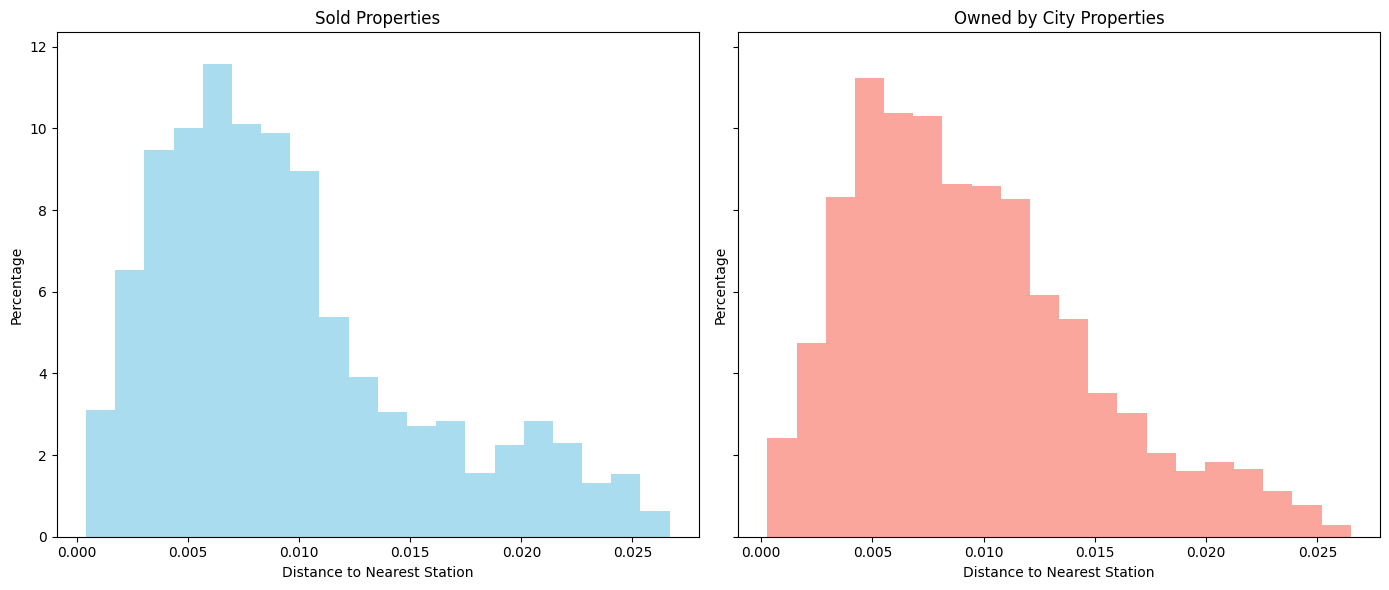

In [125]:
geometry = [Point(xy) for xy in zip(df_selected['Longitude'], df_selected['Latitude'])]
df_selected = gpd.GeoDataFrame(df_selected, geometry=geometry, crs="EPSG:4326")

# Load railway stations data
cta_stations = gpd.read_file("/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/Data/CTA_RailStations/CTA_RailStations.shp").to_crs(epsg=4326)

# Function to calculate distance to nearest station
def calculate_distance_to_nearest_station(row):
    distances = []
    for idx, station in cta_stations.iterrows():
        distance = row.geometry.distance(station.geometry)
        distances.append(distance)
    return min(distances)

# Calculate distance to nearest station for each plot
df_selected['Distance to Station'] = df_selected.apply(calculate_distance_to_nearest_station, axis=1)

# Filter for 'Sold' and 'Owned by City' properties
sold_properties = df_selected[df_selected['Property Status'] == 'Sold']['Distance to Station']
owned_by_city_properties = df_selected[df_selected['Property Status'] == 'Owned by City']['Distance to Station']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Function to plot percentage histogram
def plot_percentage_histogram(ax, data, color, title):
    # Calculate counts and bins
    counts, bins = np.histogram(data, bins=20)
    
    # Calculate percentages
    total = len(data)
    percentages = counts / total * 100
    
    # Plot bar chart
    ax.bar(bins[:-1], percentages, width=np.diff(bins), color=color, alpha=0.7, align='edge')
    
    ax.set_xlabel('Distance to Nearest Station')
    ax.set_ylabel('Percentage')
    ax.set_title(title)
    ax.set_ylim(0, max(percentages) * 1.1)  # Set y-axis limit with some padding
    ax.ticklabel_format(axis='y', style='plain')  # Ensure y-axis labels are plain numbers

# Plot percentage histogram for 'Sold' properties
plot_percentage_histogram(axes[0], sold_properties, 'skyblue', 'Sold Properties')

# Plot percentage histogram for 'Owned by City' properties
plot_percentage_histogram(axes[1], owned_by_city_properties, 'salmon', 'Owned by City Properties')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


### For Commercial

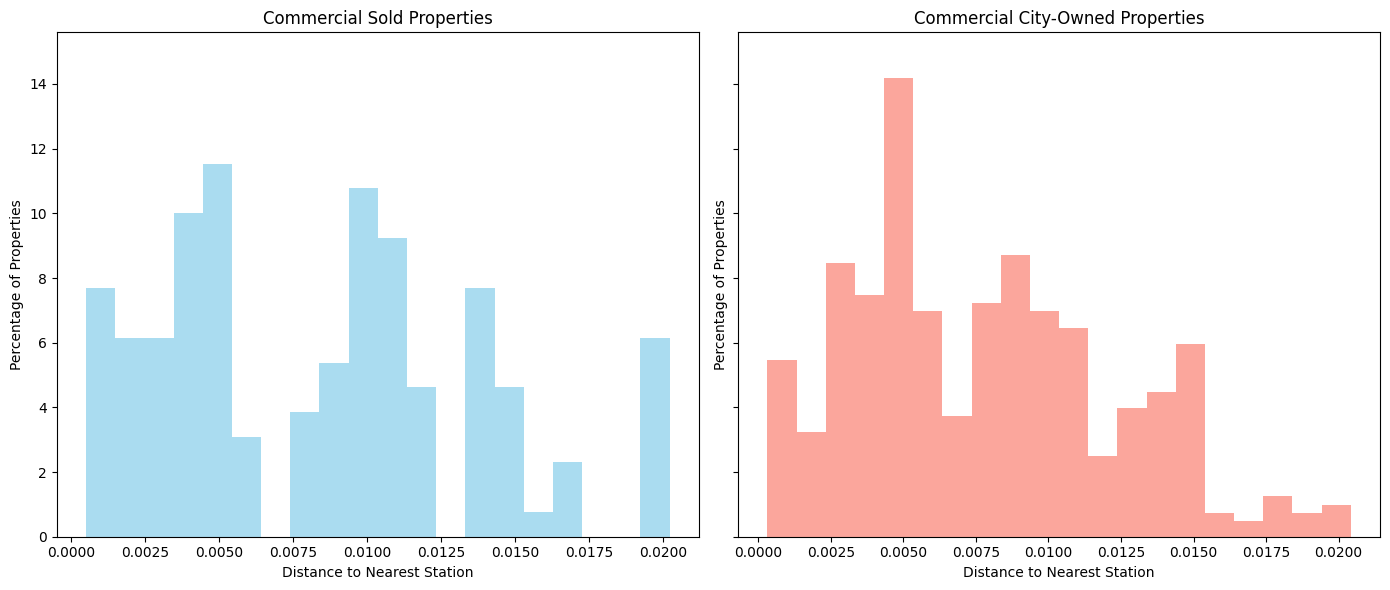

In [132]:
selected_areas = ['ENGLEWOOD', 'WEST ENGLEWOOD', 'NORTH LAWNDALE', 
                 'WEST GARFIELD PARK', 'EAST GARFIELD PARK', 'NEW CITY']
df_selected_commerical = df_selected[
    (df_selected['chicago_community_area_name'].str.upper().isin(selected_areas)) &
    (df_selected['zone'] == 'Commercial')  # Commercial zone filter
].copy()

# Ensure Longitude and Latitude are numeric
df_selected_commerical['Longitude'] = pd.to_numeric(df_selected_commerical['Longitude'], errors='coerce')
df_selected_commerical['Latitude'] = pd.to_numeric(df_selected_commerical['Latitude'], errors='coerce')

# Drop rows with missing Longitude or Latitude
df_selected_commerical = df_selected_commerical.dropna(subset=['Longitude', 'Latitude'])

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df_selected_commerical['Longitude'], df_selected_commerical['Latitude'])]
df_selected_commerical = gpd.GeoDataFrame(df_selected_commerical, geometry=geometry, crs="EPSG:4326")

# Load railway stations data
cta_stations = gpd.read_file("/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/Data/CTA_RailStations/CTA_RailStations.shp").to_crs(epsg=4326)

# Function to calculate distance to nearest station
def calculate_distance_to_nearest_station(row):
    distances = []
    for idx, station in cta_stations.iterrows():
        distance = row.geometry.distance(station.geometry)
        distances.append(distance)
    return min(distances)

# Calculate distance to nearest station for each plot
df_selected_commerical['Distance to Station'] = df_selected_commerical.apply(calculate_distance_to_nearest_station, axis=1)

# Filter for 'Sold' and 'Owned by City' commercial properties
sold_properties = df_selected_commerical[
    (df_selected_commerical['Property Status'] == 'Sold') &
    (df_selected_commerical['zone'] == 'Commercial')  # Redundant filter for safety
]['Distance to Station']

owned_by_city_properties = df_selected_commerical[
    (df_selected_commerical['Property Status'] == 'Owned by City') &
    (df_selected_commerical['zone'] == 'Commercial')  # Redundant filter for safety
]['Distance to Station']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Function to plot percentage histogram
def plot_percentage_histogram(ax, data, color, title):
    counts, bins = np.histogram(data, bins=20)
    total = len(data)
    percentages = counts / total * 100
    
    ax.bar(bins[:-1], percentages, width=np.diff(bins), color=color, alpha=0.7, align='edge')
    ax.set_xlabel('Distance to Nearest Station')
    ax.set_ylabel('Percentage of Properties')
    ax.set_title(title)
    ax.set_ylim(0, max(percentages) * 1.1)
    ax.ticklabel_format(axis='y', style='plain')

# Plot histograms
plot_percentage_histogram(axes[0], sold_properties, 'skyblue', 'Commercial Sold Properties')
plot_percentage_histogram(axes[1], owned_by_city_properties, 'salmon', 'Commercial City-Owned Properties')

# Adjust layout
plt.tight_layout()
plt.show()


### For Residential

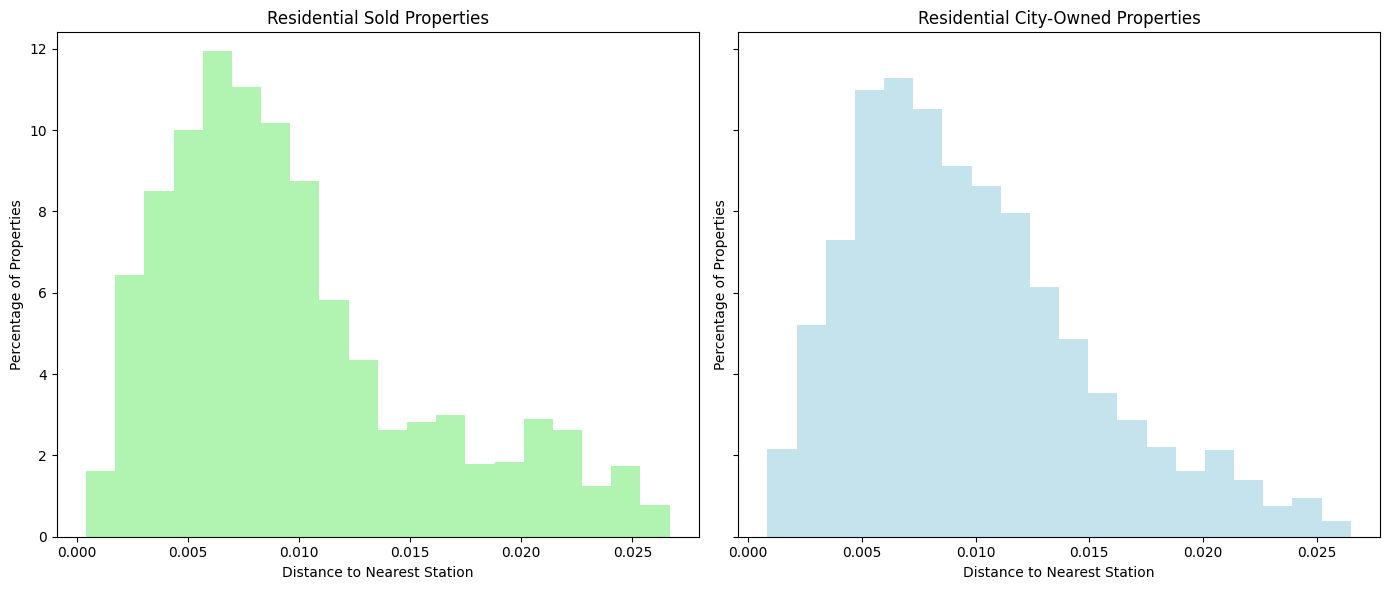

In [135]:
# Select specific areas and residential zones
selected_areas = ['ENGLEWOOD', 'WEST ENGLEWOOD', 'NORTH LAWNDALE', 
                 'WEST GARFIELD PARK', 'EAST GARFIELD PARK', 'NEW CITY']
df_selected_residential = df_selected[
    (df_selected['chicago_community_area_name'].str.upper().isin(selected_areas)) &
    (df_selected['zone'] == 'Residential')  # Residential zone filter
].copy()

# Ensure Longitude and Latitude are numeric
df_selected_residential['Longitude'] = pd.to_numeric(df_selected_residential['Longitude'], errors='coerce')
df_selected_residential['Longitude'] = pd.to_numeric(df_selected_residential['Longitude'], errors='coerce')

# Drop rows with missing Longitude or Latitude
df_selected_residential = df_selected_residential.dropna(subset=['Longitude', 'Latitude'])

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df_selected_residential['Longitude'], df_selected_residential['Latitude'])]
df_selected_residential = gpd.GeoDataFrame(df_selected_residential, geometry=geometry, crs="EPSG:4326")

# Load railway stations data
cta_stations = gpd.read_file("/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/winter_2025/Policy_Labs/Data/CTA_RailStations/CTA_RailStations.shp").to_crs(epsg=4326)

# Function to calculate distance to nearest station
def calculate_distance_to_nearest_station(row):
    distances = []
    for idx, station in cta_stations.iterrows():
        distance = row.geometry.distance(station.geometry)
        distances.append(distance)
    return min(distances)

# Calculate distance to nearest station for each plot
df_selected_residential['Distance to Station'] = df_selected_residential.apply(calculate_distance_to_nearest_station, axis=1)

# Filter for 'Sold' and 'Owned by City' residential properties
sold_properties = df_selected_residential[
    (df_selected_residential['Property Status'] == 'Sold') &
    (df_selected_residential['zone'] == 'Residential')  # Redundant filter
]['Distance to Station']

owned_by_city_properties = df_selected_residential[
    (df_selected_residential['Property Status'] == 'Owned by City') &
    (df_selected_residential['zone'] == 'Residential')  # Redundant filter
]['Distance to Station']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Function to plot percentage histogram
def plot_percentage_histogram(ax, data, color, title):
    counts, bins = np.histogram(data, bins=20)
    total = len(data)
    percentages = counts / total * 100
    
    ax.bar(bins[:-1], percentages, width=np.diff(bins), color=color, alpha=0.7, align='edge')
    ax.set_xlabel('Distance to Nearest Station')
    ax.set_ylabel('Percentage of Properties')
    ax.set_title(title)
    ax.set_ylim(0, max(percentages) * 1.1)
    ax.ticklabel_format(axis='y', style='plain')

# Plot histograms
plot_percentage_histogram(axes[0], sold_properties, 'lightgreen', 'Residential Sold Properties')
plot_percentage_histogram(axes[1], owned_by_city_properties, 'lightblue', 'Residential City-Owned Properties')

# Adjust layout
plt.tight_layout()
plt.show()